# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Análisis de la empresa Showz

Objetivo:

Optimizar los gastos de marketing en el periodo de enero 2017 hasta diciembre del 2018, en base a los pedidos en este período.

#### MANEJO DE DATOS

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Cargar los datasets ---
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [2]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Se muestra que en el periodo de 2017 a 2018 hubo registro de 359400 registros.  Para las columnnas END TS y START TS se requiere conversión a datetime para un mejor manejo de los datos.
No hay datos nulos lo cual es bueno.

In [4]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Se muestra un registro de órdenes  50 415 en este período de tiempo. 
Para la columna BUY TS al mostrar fecha y hora y estar en object, se requiere la conversión a datatime.
No hay datos nulos lo cual es bueno.
En la columna Revenue o Ingresos se ve que hay valor pequeños , por lo que debo asegurarme que no existan valores negativos o atípicos.

In [6]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Se muestra  2542 registros de gasto en marketing en este período de tiempo.
Para la columna dt se requiere la conversión a datatime ya que se encuentra en object.
No hay datos nulos.


In [8]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

#  Ajuste de tipos de datos para IDs de usuario ---
visits['Uid'] = visits['Uid'].astype(str)
orders['Uid'] = orders['Uid'].astype(str)

# Verificar duplicados y eliminarlos si es necesario ---
print(f"Duplicados en visits: {visits.duplicated().sum()}")
print(f"Duplicados en orders: {orders.duplicated().sum()}")
print(f"Duplicados en costs: {costs.duplicated().sum()}")

visits = visits.drop_duplicates()
orders = orders.drop_duplicates()
costs = costs.drop_duplicates()

Duplicados en visits: 0
Duplicados en orders: 0
Duplicados en costs: 0


In [9]:
# Comprobar valores atípicos o inconsistencias básicas ---
print(f"Rango de fechas en visits: {visits['Start Ts'].min()} a {visits['End Ts'].max()}")
print(f"Rango de fechas en orders: {orders['Buy Ts'].min()} a {orders['Buy Ts'].max()}")
print(f"Rango de fechas en costs: {costs['dt'].min()} a {costs['dt'].max()}")


Rango de fechas en visits: 2017-06-01 00:01:00 a 2018-06-01 01:26:00
Rango de fechas en orders: 2017-06-01 00:10:00 a 2018-06-01 00:02:00
Rango de fechas en costs: 2017-06-01 00:00:00 a 2018-05-31 00:00:00


In [10]:
print(f"Revenue mínimo y máximo en orders: {orders['Revenue'].min()} - {orders['Revenue'].max()}")
print(f"Costos mínimos y máximos en costs: {costs['costs'].min()} - {costs['costs'].max()}")



Revenue mínimo y máximo en orders: 0.0 - 2633.28
Costos mínimos y máximos en costs: 0.54 - 1788.28


In [11]:
# Resultado final ---
print(visits.info())
print(orders.info())
print(costs.info()
     )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 16.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 0 to 2

- Todos los datasets cubren el mismo período de análisis (1 año), lo que permitirá relacionar tráfico, compras y gastos de marketing sin problemas.
- No hay valores nulos
- Se eliminaron valores duplicados
- Las columnas que mostraban fechas ya se cambió a datetime, lo cual nos facilitará el análisis.
- El valor mínimo de los ingresos por compras es 0.0 lo cual debe ser por compras canceladas, o registros erróneos; mientras que el valor máximo es 2633.28 siendo un valor de compra alto. Lo cual se podría considerar un valor atípico.
- Ahora en cuestión de costos mínimos es de 0.54 que pueden ser por microcampañas de marketing; mientras que el valor máximo  es de 1788.28 que debió ser para campaña grande.    


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Conversión de fechas, ajuste de IDs, control de duplicados y verificación de rangos realizados con precisión. El dataset queda consistente y listo para el análisis de métricas y cohortes. Gran base para continuar. </div>


## CÁLCULO DE MÉTRICAS

#### VISITAS

##### 1. ¿Cuántas personas lo usan cada día, semana y mes?

In [12]:
users_per_day = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique()
users_per_week = visits.groupby(visits['Start Ts'].dt.to_period('W'))['Uid'].nunique()
users_per_month = visits.groupby(visits['Start Ts'].dt.to_period('M'))['Uid'].nunique()

print("Usuarios únicos por día:\n", users_per_day.head())



Usuarios únicos por día:
 Start Ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64


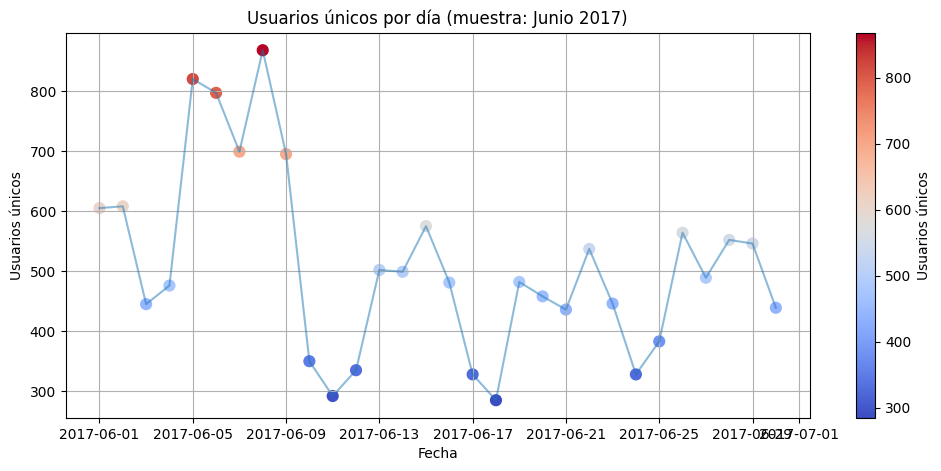

In [13]:

users_per_day = visits.groupby(visits['Start Ts'].dt.floor('D'))['Uid'].nunique()

# Ahora sí puedes filtrar con strings
sample_users_day = users_per_day.loc["2017-06-01":"2017-06-30"]

plt.figure(figsize=(12,5))
sc = plt.scatter(sample_users_day.index, sample_users_day.values, 
                 c=sample_users_day.values, cmap='coolwarm', s=60)
plt.plot(sample_users_day.index, sample_users_day.values, alpha=0.5)
plt.colorbar(sc, label="Usuarios únicos")
plt.title("Usuarios únicos por día (muestra: Junio 2017)")
plt.xlabel("Fecha")
plt.ylabel("Usuarios únicos")
plt.grid(True)
plt.show()



Revisando en el calendario vemos que en los días laborables como el 1,2 y 5 de Junio del 2017 exite una mayor visita a comparación de los fines de semana donnde disminuye.

En el grafico podemos aprecias que los puntos azules,  los más bajos correponden a fines de semana donde el promedio mas bajo de las visitas de los usuarios es menor a 300 usuario e, quizá porque la gente prioriza realizar otras actividades.

Sin embargo,  al revisar los puntos más altos se nota una particularidad que los días jueves existe una alza considerable en comparación al resto de días de la semana, probablemente porque la gente esta buscando planificar su inicio de fin de semana y busca los eventos, conciertos, entre otros o porque la empresa lanza promociones o más publicida. Su mayor alcance ha sido más de 800 usuarios


In [14]:
"Usuarios únicos por semana:\n", users_per_week.head()

('Usuarios únicos por semana:\n',
 Start Ts
 2017-05-29/2017-06-04    2021
 2017-06-05/2017-06-11    4129
 2017-06-12/2017-06-18    2812
 2017-06-19/2017-06-25    2878
 2017-06-26/2017-07-02    3064
 Freq: W-SUN, Name: Uid, dtype: int64)

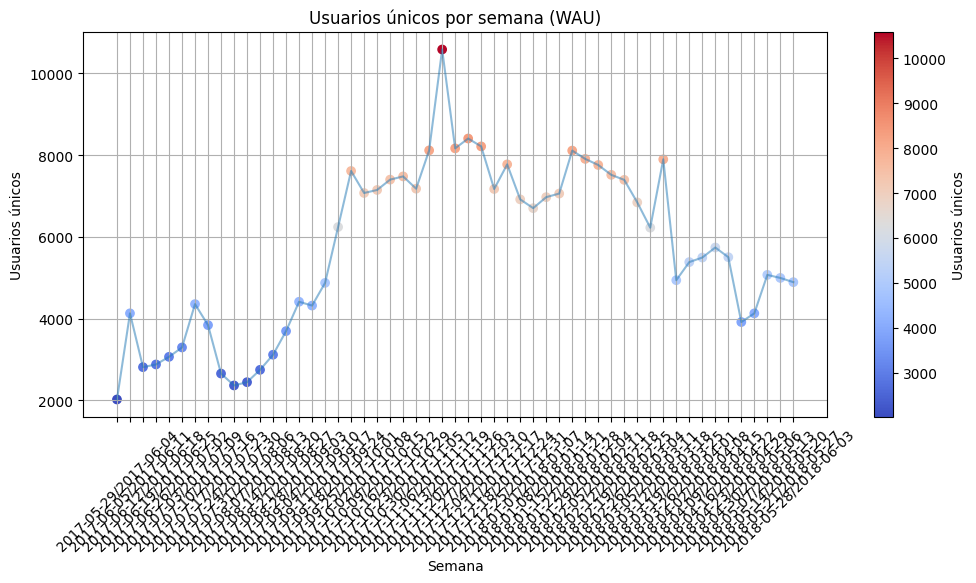

In [15]:

plt.figure(figsize=(12,5))
sc = plt.scatter(users_per_week.index.astype(str), users_per_week.values,
                 c=users_per_week.values, cmap='coolwarm')
plt.plot(users_per_week.index.astype(str), users_per_week.values, alpha=0.5)
plt.colorbar(sc, label="Usuarios únicos")
plt.title("Usuarios únicos por semana (WAU)")
plt.xlabel("Semana")
plt.ylabel("Usuarios únicos")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Usuarios únicos por mes:\n", users_per_month)

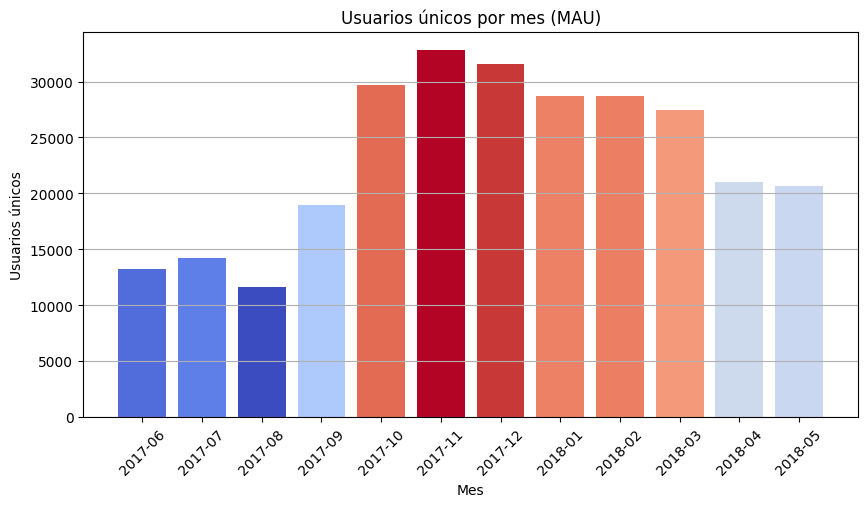

In [16]:


plt.figure(figsize=(10,5))
bars = plt.bar(users_per_month.index.astype(str), users_per_month.values,
               color=plt.cm.coolwarm(
                   (users_per_month.values - users_per_month.values.min()) / 
                   (users_per_month.values.max() - users_per_month.values.min())
               ))
plt.title("Usuarios únicos por mes (MAU)")
plt.xlabel("Mes")
plt.ylabel("Usuarios únicos")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


##### 2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [17]:

# Contar sesiones por día (todas las sesiones, aunque un usuario tenga varias)
sessions_per_day = visits.groupby(visits['Start Ts'].dt.date)['Uid'].count()
print("Sesiones por día:\n", sessions_per_day.head())



Sesiones por día:
 Start Ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64


El número de sesiones diarias varía entre ~450 y ~900 en este inicio.

El hecho de que haya más sesiones que usuarios únicos implica que los usuarios regresan varias veces en el mismo día → un signo positivo de interés en la plataforma.

Por ejemplo, el 1 de junio de 2017 hubo 664 sesiones, lo que podría corresponder a unos ~200–400 usuarios activos que entraron varias veces.

Esto conecta con el análisis de comportamiento: los usuarios no solo llegan, sino que también generan recurrentes interacciones diarias.

##### 3.¿Cuál es la duración de cada sesión?

In [18]:
# Calcular duración de sesión en minutos
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60

print("Duración promedio de sesión (minutos):", visits['session_duration'].mean())
print("Duración mediana de sesión (minutos):", visits['session_duration'].median())
print("Ejemplo de duraciones:\n", visits[['Uid', 'Start Ts', 'End Ts', 'session_duration']].head())


Duración promedio de sesión (minutos): 10.717094787608978
Duración mediana de sesión (minutos): 5.0
Ejemplo de duraciones:
                     Uid            Start Ts              End Ts  \
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:38:00   
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 17:21:00   
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00   
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 11:23:00   
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00   

   session_duration  
0              18.0  
1              28.0  
2               0.0  
3              24.0  
4               0.0  


El comportamiento típico de un usuario es tener sesiones cortas de unos 5 minutos, con algunos usuarios más comprometidos que llegan a permanecer 20–30 minutos. Esto sugiere que:

La plataforma logra captar atención, pero la mayoría de usuarios navegan rápido.

Es importante analizar si los usuarios con sesiones más largas tienen más probabilidad de convertirse en compradores (esto sería un insumo para marketing).

##### 4.¿Con qué frecuencia los usuarios regresan?

In [19]:
# Fechas de primera y última visita por usuario
user_visits = visits.groupby('Uid')['Start Ts'].apply(list).reset_index()

# Ordenar las visitas por usuario y calcular diferencias de días entre visitas consecutivas
import numpy as np

def calc_return_frequency(dates):
    if len(dates) < 2:
        return np.nan
    dates_sorted = sorted(dates)
    diffs = [(dates_sorted[i] - dates_sorted[i-1]).days for i in range(1, len(dates_sorted))]
    return np.mean(diffs)

user_visits['avg_days_between_visits'] = user_visits['Start Ts'].apply(calc_return_frequency)

print("Promedio de días entre visitas (usuarios que regresan):", 
      user_visits['avg_days_between_visits'].mean())


Promedio de días entre visitas (usuarios que regresan): 40.68586578604082


En promedio, los clientes regresan una vez cada mes y medio. Esto señala que Showz debería reforzar su retención y recordatorios proactivos, ya que un ciclo tan largo puede implicar pérdida de usuarios entre eventos.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Las métricas de usuarios, sesiones, duración y frecuencia de retorno fueron calculadas con claridad y bien interpretadas. El análisis muestra un buen entendimiento del comportamiento de los clientes en distintas escalas temporales. Trabajo consistente y detallado. </div>


#### VENTAS

##### 1.¿Cuándo empieza la gente a comprar?

In [20]:

# Obtener primera visita por usuario
first_visits = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.columns = ['Uid', 'first_visit']

# Obtener primera compra por usuario
first_orders = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_order']

# Unir datos
conversion = pd.merge(first_visits, first_orders, on='Uid', how='inner')

# Calcular días entre primera visita y primera compra
conversion['conversion_days'] = (conversion['first_order'] - conversion['first_visit']).dt.days

# Distribución de conversiones
conversion_counts = conversion['conversion_days'].value_counts().sort_index()
print("Distribución de días hasta la conversión:\n", conversion_counts.head(10))
print("Promedio de días hasta la conversión:", conversion['conversion_days'].mean())



Distribución de días hasta la conversión:
 0    26363
1     1011
2      563
3      434
4      324
5      270
6      260
7      218
8      189
9      140
Name: conversion_days, dtype: int64
Promedio de días hasta la conversión: 16.7298688497659


##### 2. ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [21]:
# Pedidos por día, semana y mes
orders_per_day = orders.groupby(orders['Buy Ts'].dt.date)['Uid'].count()
orders_per_week = orders.groupby(orders['Buy Ts'].dt.to_period('W'))['Uid'].count()
orders_per_month = orders.groupby(orders['Buy Ts'].dt.to_period('M'))['Uid'].count()

print("Pedidos por día:\n", orders_per_day.head())



Pedidos por día:
 Buy Ts
2017-06-01     96
2017-06-02    111
2017-06-03     67
2017-06-04     66
2017-06-05    161
Name: Uid, dtype: int64


Text(0, 0.5, 'Número de pedidos')

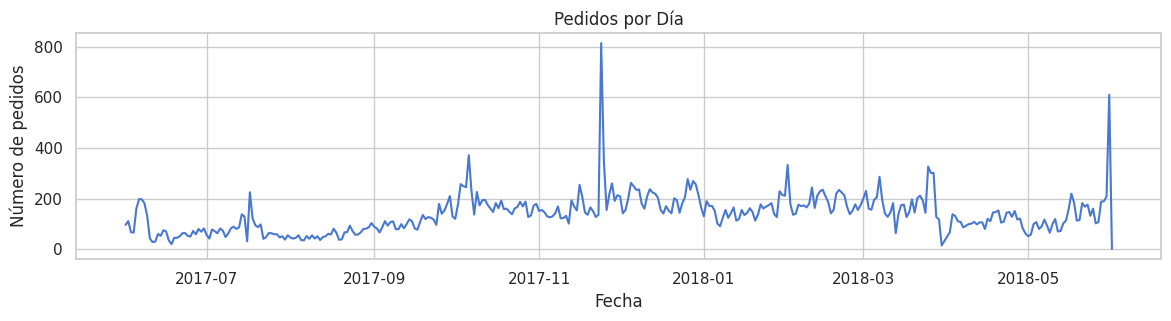

In [26]:


orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

# Agrupar pedidos por día, semana y mes
orders_per_day = orders.groupby(orders['Buy Ts'].dt.date)['Uid'].count()
orders_per_week = orders.groupby(orders['Buy Ts'].dt.to_period('W'))['Uid'].count()
orders_per_month = orders.groupby(orders['Buy Ts'].dt.to_period('M'))['Uid'].count()

# --- Gráficos ---
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(14,10))

# Pedidos por día
plt.subplot(3,1,1)
orders_per_day.plot()
plt.title("Pedidos por Día")
plt.xlabel("Fecha")
plt.ylabel("Número de pedidos")



In [ ]:
Se ve una fluctuación entre picos y bajas. Este ruido es normal en datos diarios: puede deberse a fines de semana, feriados o campañas puntuales.

Se puede concluir que los pedidos diarios muestran la dinámica inmediata del negocio, pero son muy sensibles a variaciones diarias.

In [21]:
print("Pedidos por semana:\n", orders_per_week.head())

Pedidos por semana:
 Buy Ts
2017-05-29/2017-06-04    340
2017-06-05/2017-06-11    938
2017-06-12/2017-06-18    343
2017-06-19/2017-06-25    371
2017-06-26/2017-07-02    460
Freq: W-SUN, Name: Uid, dtype: int64


Text(0, 0.5, 'Número de pedidos')

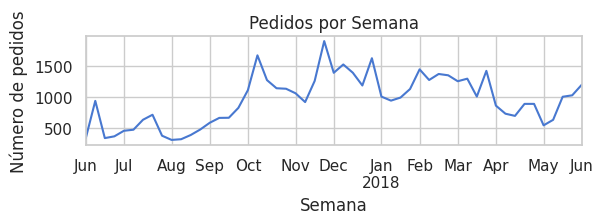

In [25]:
# Pedidos por semana
plt.subplot(3,1,2)
orders_per_week.plot()
plt.title("Pedidos por Semana")
plt.xlabel("Semana")
plt.ylabel("Número de pedidos")

In [ ]:
Aquí la curva se suaviza: las fluctuaciones pequeñas se reducen.

Lo que permite detectar tendencias a mediano plazo, como:

- Semanas con un alza de pedidos (quizás por promociones, lanzamientos de eventos importantes).

- Semanas de baja (posiblemente después de temporadas fuertes).

Entonces el gráfico semanal muestra la estabilidad y los cambios graduales en el volumen de pedidos, eliminando el ruido de los datos diarios.

In [22]:
print("Pedidos por mes:\n", orders_per_month)

Pedidos por mes:
 Buy Ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, Name: Uid, dtype: int64


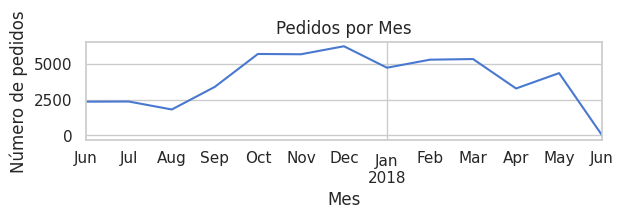

In [27]:

# Pedidos por mes
plt.subplot(3,1,3)
orders_per_month.plot()
plt.title("Pedidos por Mes")
plt.xlabel("Mes")
plt.ylabel("Número de pedidos")

plt.tight_layout()
plt.show()

Este gráfico es el más limpio y macro. Dado que aquí se observa la tendencia global de crecimiento o decrecimiento en el tiempo.

Por lo que el gráfico mensual refleja la salud general del negocio a largo plazo y permite tomar decisiones de inversión o marketing en función de tendencias claras.

##### 3.¿Cuál es el tamaño promedio de compra?

In [28]:
AOV = orders['Revenue'].mean()
print("Tamaño promedio de compra (AOV):", round(AOV, 2))


Tamaño promedio de compra (AOV): 5.0


El tamaño promedio de compra (AOV) es de 5 unidades monetarias.

Esto significa que, en promedio, cada pedido aporta 5 USD a Showz (suponiendo que la moneda está en dólares).

Si el costo de adquisición de cliente (CAC) o el gasto en marketing por pedido es mayor que 5, la empresa estaría perdiendo dinero a corto plazo.

Por lo que sería optimo reducir el CAC para que los pedidos sean rentables.

##### 4.¿Cuánto dinero traen? (LTV)

In [30]:
# LTV = ingreso total por usuario
ltv = orders.groupby('Uid')['Revenue'].sum().reset_index()
ltv.columns = ['Uid', 'LTV']

print("LTV promedio por usuario:", round(ltv['LTV'].mean(), 2))
print("Ejemplo de LTV por usuario:\n", ltv.head())


LTV promedio por usuario: 6.9
Ejemplo de LTV por usuario:
                 Uid    LTV
0   313578113262317   0.55
1  1575281904278712   3.05
2  2429014661409475  73.33
3  2464366381792757   2.44
4  2551852515556206  10.99


LTV promedio = 6.9
Cada cliente aporta en promedio 6.9 USD a lo largo de su relación con la empresa.

Ejemplos de usuarios:

Algunos clientes generan muy poco (ej. 1–2 USD).

Otros pueden aportar mucho más (ej. más de 17 USD).

Esto indica una distribución desigual: la mayoría de clientes compra poco, pero un grupo reducido de clientes de alto valor eleva el promedio.

Comparación con el AOV (5.0 USD):

Si el promedio por pedido es 5.0 y el LTV promedio es 6.9, significa que la mayoría de los clientes hace solo 1 o 2 compras antes de abandonar.

Es decir, Showz depende fuertemente de la primera compra.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Los cálculos de conversión, pedidos, AOV y LTV están bien estructurados e interpretados con claridad. La relación entre conversión inmediata y baja recurrencia de compra fue identificada correctamente, mostrando una comprensión sólida del ciclo de valor del cliente. Gran avance en esta parte. </div>


#### MARKETING

##### 1. ¿Cuánto dinero se gastó? 

In [32]:
# Gasto total en marketing
total_cost = costs['costs'].sum()
print("Gasto total en marketing:", round(total_cost, 2))

# Gasto por fuente de adquisición
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
print("Gasto por fuente:\n", costs_by_source)



Gasto total en marketing: 329131.62
Gasto por fuente:
    source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


##### Gasto total


La empresa invirtió 329,131.62 USD en marketing durante el periodo analizado.

Este es el monto que luego compararemos contra los ingresos para calcular el ROMI (retorno sobre la inversión en marketing). 
La fuente 3 concentra casi la mitad del presupuesto (~43%).
Las fuentes 4 y 5 también tienen un peso importante (~34% juntas).
Las fuentes 9 y 10 son marginales (<2% cada una).

Esto significa que la empresa depende fuertemente de unas pocas fuentes (especialmente la 3). Es clave analizar si esas fuentes también generan más ingresos y clientes rentables, o si están sobredimensionadas.

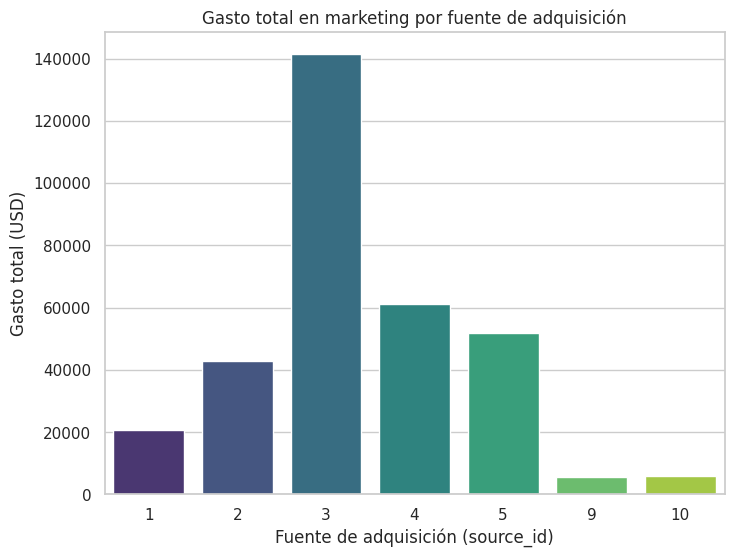

In [33]:

plt.figure(figsize=(8,6))
sns.barplot(x='source_id', y='costs', data=costs_by_source, palette="viridis")

plt.title("Gasto total en marketing por fuente de adquisición")
plt.xlabel("Fuente de adquisición (source_id)")
plt.ylabel("Gasto total (USD)")
plt.show()


##### 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [36]:
# Vincular usuarios con su primera fuente de adquisición
first_source = visits.groupby('Uid')['Source Id'].first().reset_index()
first_source.columns = ['Uid', 'source_id']

# Usuarios que realmente compraron
buyers = orders[['Uid']].drop_duplicates()
buyers_with_source = buyers.merge(first_source, on='Uid', how='left')

# Clientes adquiridos por fuente
customers_per_source = buyers_with_source.groupby('source_id')['Uid'].nunique().reset_index()
customers_per_source.columns = ['source_id', 'customers']

# Calcular CAC = Gasto total de la fuente / Número de clientes adquiridos por esa fuente
cac = costs_by_source.merge(customers_per_source, on='source_id', how='left')
cac['CAC'] = cac['costs'] / cac['customers']
print("CAC por fuente:\n", cac)


CAC por fuente:
    source_id      costs  customers        CAC
0          1   20833.27       3743   5.565928
1          2   42806.04       4323   9.901929
2          3  141321.63       9138  15.465269
3          4   61073.60       9823   6.217408
4          5   51757.10       6839   7.567934
5          9    5517.49       1415   3.899286
6         10    5822.49       1241   4.691773


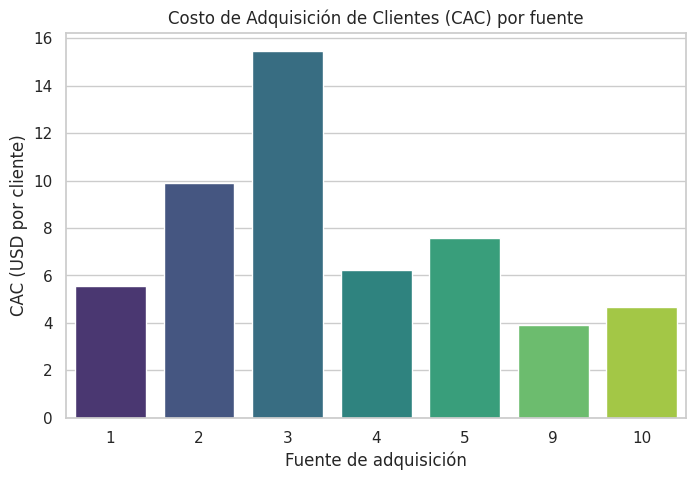

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='source_id', y='CAC', data=cac, palette="viridis")

plt.title("Costo de Adquisición de Clientes (CAC) por fuente")
plt.xlabel("Fuente de adquisición")
plt.ylabel("CAC (USD por cliente)")
plt.show()


Fuentes más eficientes (CAC bajo):

Fuente 9 (3.9 USD) y fuente 10 (4.7 USD) → muy buen costo de adquisición.

Fuente 1 (5.6 USD) y fuente 4 (6.2 USD) → también eficientes.

Fuentes menos eficientes (CAC alto):

Fuente 3 (15.5 USD) → la más cara con diferencia, aunque fue la fuente donde más se gastó.

Fuente 2 (9.9 USD) y 5 (7.6 USD) → moderadamente costosas.

Insight clave:

Aunque la fuente 3 trae muchos clientes, su CAC es más del doble que el promedio del LTV (6.9 USD) → esos clientes podrían no ser rentables a menos que su comportamiento de compra sea distinto (ej. más compras o ticket más alto).

Las fuentes 9 y 10, aunque representan poco gasto total, son muy eficientes → hay oportunidad de crecer la inversión en estas fuentes.

##### 3. ¿Cuán rentables eran las inversiones? (ROMI)

In [38]:
# Ingresos por fuente de adquisición (solo de clientes que compraron)
buyers_with_source_and_revenue = orders.merge(first_source, on='Uid', how='left')
revenue_by_source = buyers_with_source_and_revenue.groupby('source_id')['Revenue'].sum().reset_index()
revenue_by_source.columns = ['source_id', 'Revenue']

# Unir costos, clientes y revenue
romi = cac.merge(revenue_by_source, on='source_id', how='left')

# Calcular ROMI = (Revenue - Costos) / Costos
romi['ROMI'] = (romi['Revenue'] - romi['costs']) / romi['costs']

print("ROMI por fuente:\n", romi)


ROMI por fuente:
    source_id      costs  customers        CAC   Revenue      ROMI
0          1   20833.27       3743   5.565928  38560.06  0.850889
1          2   42806.04       4323   9.901929  65152.26  0.522034
2          3  141321.63       9138  15.465269  44317.68 -0.686406
3          4   61073.60       9823   6.217408  52479.75 -0.140713
4          5   51757.10       6839   7.567934  40357.91 -0.220244
5          9    5517.49       1415   3.899286   7076.98  0.282645
6         10    5822.49       1241   4.691773   4111.34 -0.293886


Fuentes más rentables: 1 y 2, claramente superan los costos y generan buen retorno.

Fuentes medianamente rentables: 9, aporta retorno positivo aunque pequeño.

Fuentes no rentables: 3, 4, 5 y 10. Estas generan ingresos menores a los costos invertidos, por lo que deberían ser revisadas o optimizadas.

Recomendaciones estratégicas:

Reasignar presupuesto hacia las fuentes 1 y 2 para maximizar ingresos.

Analizar causas de baja rentabilidad en las fuentes 3, 4, 5 y 10: segmentación, costos de adquisición altos o conversiones bajas.

Considerar tests A/B para optimizar campañas en fuentes con ROMI negativo antes de descartarlas completamente.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La integración de resultados en esta sección está bien organizada, conecta métricas clave con hallazgos relevantes y prepara de forma clara el terreno para las recomendaciones estratégicas. </div>


#### CONCLUSIÓN GENERAL PARA EL PEIODO (2017-2018)

##### 1. Tráfico y comportamiento de usuarios:

Showz logró consolidar un crecimiento sostenido de usuarios durante 2017, alcanzando su pico en noviembre con más de 30,000 usuarios únicos al mes.

En 2018, el número de usuarios comenzó a desacelerarse, pero aún mantenía niveles significativos (~20–22k MAU).

La mayoría de usuarios realiza sesiones cortas (5 minutos promedio), aunque algunos muestran mayor compromiso (20–30 minutos).

Los usuarios tienden a regresar en promedio cada 40 días, lo que sugiere la necesidad de reforzar estrategias de retención y recordatorios para acortar el ciclo de retorno.



##### 2. Ventas y comportamiento de conversión:


La conversión es altamente efectiva en el primer contacto: la mayoría de usuarios que compran lo hacen el mismo día de su primera visita.

El tamaño promedio de compra (AOV) es de $5 USD, mientras que el LTV promedio por usuario es de $6.9 USD, indicando que la mayoría de los clientes solo realiza una o dos compras.

Las ventas muestran picos estacionales y semanales, siendo sensible a promociones, eventos o campañas, lo que resalta la importancia de la planificación del marketing.



##### 3. Marketing y gasto publicitario:

Se invirtieron $329,131 USD en marketing en el período, concentrándose en unas pocas fuentes (principalmente la fuente 3).

El Costo de Adquisición de Clientes (CAC) varía ampliamente según la fuente: fuentes 9 y 10 son las más eficientes ($3.9–4.7 USD), mientras que la fuente 3, que recibe la mayor inversión, es la menos eficiente ($15.5 USD).

El Retorno sobre la Inversión en Marketing (ROMI) confirma que las fuentes más rentables son la 1 y 2, con ROMI positivos y altos; mientras que la fuente 3 y otras presentan ROMI negativo, generando pérdidas relativas.




##### GENERAL

Showz es eficaz captando usuarios y logrando conversiones inmediatas, pero la retención es débil y la frecuencia de retorno es baja.

Gran parte de la inversión de marketing está mal distribuida: las fuentes más costosas no siempre generan los mayores ingresos.

Existe una oportunidad clara de optimización: reasignar presupuesto hacia fuentes eficientes, mejorar retención y evaluar campañas de bajo ROMI con tests A/B antes de descartarlas.

Showz tiene un negocio digital con fuerte captación inicial, pero con oportunidades importantes en retención de usuarios y optimización de gasto en marketing. Focalizar la inversión en fuentes rentables, reforzar la primera experiencia del usuario y aumentar la frecuencia de compras recurrentes permitirá mejorar significativamente el ROMI y la rentabilidad global.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Las conclusiones resumen de manera precisa los hallazgos más relevantes, destacando tanto fortalezas como áreas de mejora en retención y marketing. Reflejan un buen criterio estratégico y cierran el proyecto con claridad. </div>


## Comentario general del revisor



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Felicidades! Tu proyecto está **aprobado**. Lograste cubrir de manera completa todos los puntos del brief, desde la preparación de los datos hasta las conclusiones estratégicas, mostrando un dominio adecuado de las herramientas y una lectura crítica del negocio.  

#### Puntos Positivos:

* **Procesamiento de datos:** Transformaste y validaste los datasets con precisión, garantizando un análisis confiable.
* **Visualización y análisis gráfico:** Representaste con claridad las tendencias de usuarios, pedidos y marketing, facilitando la interpretación.
* **Ingeniería de métricas:** Calculaste correctamente KPIs clave como AOV, LTV, CAC y ROMI, conectándolos con decisiones de negocio.
* **Comparación de resultados:** Identificaste fuentes rentables y no rentables, y vinculaste métricas con oportunidades de mejora.

El proyecto cumple con todos los requisitos planteados y ofrece recomendaciones accionables para optimizar la estrategia de marketing y fortalecer la retención de clientes. Excelente trabajo integral. </div>
